## 《合成孔径雷达成像——算法与实现》中2.5.3 采样引起的频谱平移（实信号）

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

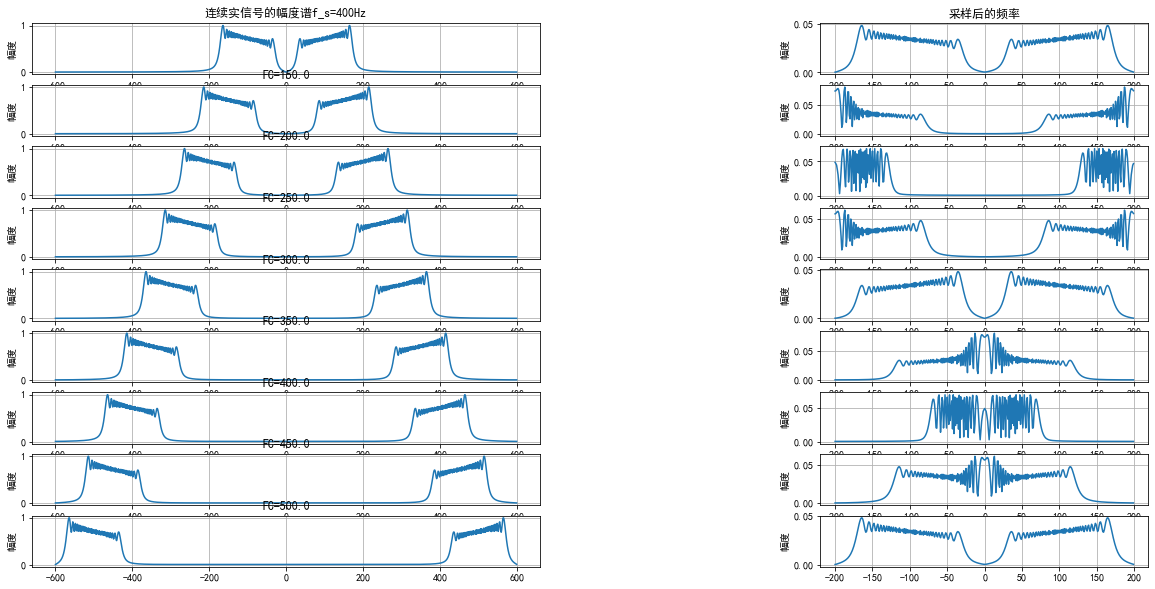

In [4]:
#% LFM信号 实信号 s(t) = cos( 2*pi*(f0.*t +0.5*k*t^2) )
#% LFM信号 复信号 s(t) = exp( 1i*2*pi*(f0.*t +0.5*k*t^2) )

h = plt.figure(figsize=(20,10)) #; set( h, 'position', [100,100,900,600] ); 
sub_row = 9
for row in range(9):
    
    #% 设置时间长度T; 带宽BW; 初始频率f0
    T  = 1;
    BW = 150;
    f0 = 25 + (row)*50;
    
    #% 斜率
    k  = BW/T;
    
    #% 生成时间
    dt = 1/1200;
    t  = np.arange(0,T,dt)
    fs = 1/dt;
    #% 信号幅度修正
    amp = t + 2;
    amp = amp/np.max(np.abs(amp));
    #% 生成信号
    N  = len(t);
    s1 = np.cos(2*np.pi*(f0*t + 0.5*k*t**2) ) * amp;     #% 实数基带
    # % 进行fft
    F1 = np.fft.fftshift( np.fft.fft( s1 ) / N );  
    F1 = F1/np.max(np.abs(F1));
    #% 频率
    fre1 = np.arange(0,N,1)*fs/N - fs/2;
    
    #% 生成时间
    dt = 1/400;
    t  = np.arange(0,T,dt)
    fs = 1/dt;
    #% 信号幅度修正
    amp = t + 2;
    amp = amp/np.max(np.abs(amp));
    #% 生成信号
    N  = len(t);
    s1 = np.cos(2*np.pi*(f0*t + 0.5*k*t**2) ) * amp;  #   % 实数基带
    #% 进行fft
    F2 = np.fft.fftshift( np.fft.fft( s1 ) / N );  F1 = F1/np.max(np.abs(F1));
    #% 频率
    fre2 = np.arange(0,N,1)*fs/N - fs/2;
    
    #% 画图
    #sub_row = plt.figure(h); # hold on
    plt.subplot(sub_row,2,2*(row)+1 );plt.plot( fre1, np.abs(F1) ); 
    plt.ylabel('幅度');   plt.title( ['FC=',str(f0+BW/2)])
    plt.grid()
    if row == 0:
        plt.title('连续实信号的幅度谱f_s=400Hz');
    else:
        plt.title('FC='+str(f0+BW/2));
    plt.subplot(sub_row,3,3*(row)+3 );plt.plot( fre2, np.abs(F2) ); 
    plt.ylabel('幅度');  
    plt.grid()
    if row == 0:
        plt.title('采样后的频率');

   
#h.tight_layout()
